In [17]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


data = pd.read_csv("sp500_tm.csv")
data.head()
x = data.drop("Direction", axis = 1)
y = data.Direction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model1 = RandomForestClassifier().fit(x_train, y_train)
model1.score(x_test, y_test)

model2 = AdaBoostClassifier().fit(x_train, y_train)
model2.score(x_test, y_test)

model3 = GradientBoostingClassifier().fit(x_train, y_train)
model3.score(x_test, y_test)







0.3333333333333333

## 1. Ensemble의 Boosting
###Gradient Boosting, XGBoost, LightGBM

###Gradient boosting
- 강력한 앙상블 기법
- DT를 Boost하여 오차 Gradient를 최소화
- Tree모형을 기반으로 하는 앙상블
- 미분 가능한 loss 함수와 GD 최적화 알고리즘을 사용(=ANN)
- GBM의 하이퍼파라미터
 - The number of trees or estimators in the model.
 - The learning rate of the model.
 - The row and column sampling rate for stochastic models.
 - The maximum tree depth.
 - The minimum tree weight.
 - The regularization terms alpha and lambda.

 - loss : 경사 하강법에서 사용할 비용 함수. 기본값 'devidence'

 - learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. 기본값은  0.1
  - weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수
  - 0 ~ 1 사이의 값
  - 작을 경우, 예측 성능이 높아질 수 있으나 많은 week learner가 순차적인 반복이 필요해 수행시간이 길어지고 local optima에 빠질 수 있음
  - 너무 큰 값을 설정하는 경우, 최적값을 못찰을 수 있어 성능이 떨어질 가능성이 있으나, 시간은 단축
  - learning_rate은 n_estimator와 상호 보완적으로 활용

 - n_estimators: weak learner의 개수이며,기본값은 100
  - weak learner가 많으면 성능 개선이 있지만 많은 시간 소요

- subsample: weak learner가 학습에 사용하는 데이터 샘플링의 비율, 기본값은 1이며, 전체 데이터를 기반으로 학습함. 1보다 작은 값을 설정해서 과적합을 완화시킬 수 있음

In [ ]:
# gradient boosting for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

#  dataset 생성
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model = GradientBoostingClassifier()
model.fit(X, y)

# 10개값을 갖는 한 개의 X 샘플에 대한 범주 예측
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Prediction: 1


### 2. Histogram-Based Gradient Boosting
- LightGBM library와 유사한 GB 모형
- HistGradientBoostingClassifier와 HistGradientBoostingRegressor
- 속도가 개선된 GB모형.


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting

#분류
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model = HistGradientBoostingClassifier()
model.fit(X, y)

# prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Prediction: 1


### 3.Gradient Boosting With XGBoost
- Extreme Gradient Boosting을 의미하며, sklearn 대신 xgboost 라이브러리 이용
- 계산 효율성을 높이며, 성능도 개선
- colab에 설치되어 있으며 필요 시 !pip install xgboost
- XGBClassifier와 XGBregressor 제공


In [ ]:
# 분류, xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model = XGBClassifier()
model.fit(X, y)

# prediction
row = [2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Prediction: 1


### 4.Gradient Boosting With LightGBM
- Light Gradient Boosted Machine
- MS에 의해 개발, 효율성이 강조된 GBM
- 설치되어 있으며 필요 시 !pip install lightgbm
- LGBMClassifier , LGBMRegressor classes.


In [ ]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

model = LGBMClassifier()
model.fit(X, y)

# prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)



[LightGBM] [Info] Number of positive: 501, number of negative: 499
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501000 -> initscore=0.004000
[LightGBM] [Info] Start training from score 0.004000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Prediction: 1


### 5.Gradient Boosting with CatBoost
- CatBoost는 Yandex가 개발한 라이브러리
- 효율적으로 계산하여 속도 개선
- 범주형 X변수에 대해 잘 작동: Category Gradient Boosting
- 설치 안되어 있으므로, 다음을 이용해서 설치
- !pip install catboost



In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
# catboost for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit
model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X, y)

# prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)


Accuracy: 0.925 (0.025)
Prediction: 1


### 6. Adaboost, Gradient Boosting, XGBoost 비교



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[x] for x in iris.target]

X2 = df.drop('species', axis=1)
y2 = df['species']


### 1. Adaboost


In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

clf = AdaBoostClassifier( n_estimators=5, learning_rate=0.5, random_state=100).fit(X,y)
clf = AdaBoostClassifier( base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=10),#base_estimator를 변경할 수 있음
            n_estimators=5,  learning_rate=0.5, random_state=100 ).fit(X,y)

In [ ]:
#iris로 테스트
clf = AdaBoostClassifier( base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=10),#base_estimator를 변경할 수 있음
            n_estimators=5,  learning_rate=0.5, random_state=100).fit(X2,y2)

In [ ]:
## 예측
print(clf.predict(X2)[:3])

## 변수 중요도
for i, col in enumerate(X2.columns):
    print(f'{col} Importance : {clf.feature_importances_[i]}')

print(clf.get_params())
print('Accuracy : ', clf.score(X2,y2))


['setosa' 'setosa' 'setosa']
sepal length (cm) Importance : 0.0
sepal width (cm) Importance : 0.0
petal length (cm) Importance : 0.4
petal width (cm) Importance : 0.6
{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 10, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=1, min_samples_leaf=10), 'estimator': None, 'learning_rate': 0.5, 'n_estimators': 5, 'random_state': 100}
Accuracy :  0.9533333333333334


In [ ]:
for i in range(len(clf.estimators_)):
    ind_est = clf.estimators_[i]
    col_idx = ind_est.tree_.feature[0]
    print(X2.columns[col_idx]) ## 루트 노드에서의 분리 변수


petal width (cm)
petal width (cm)
petal length (cm)
petal width (cm)
petal length (cm)


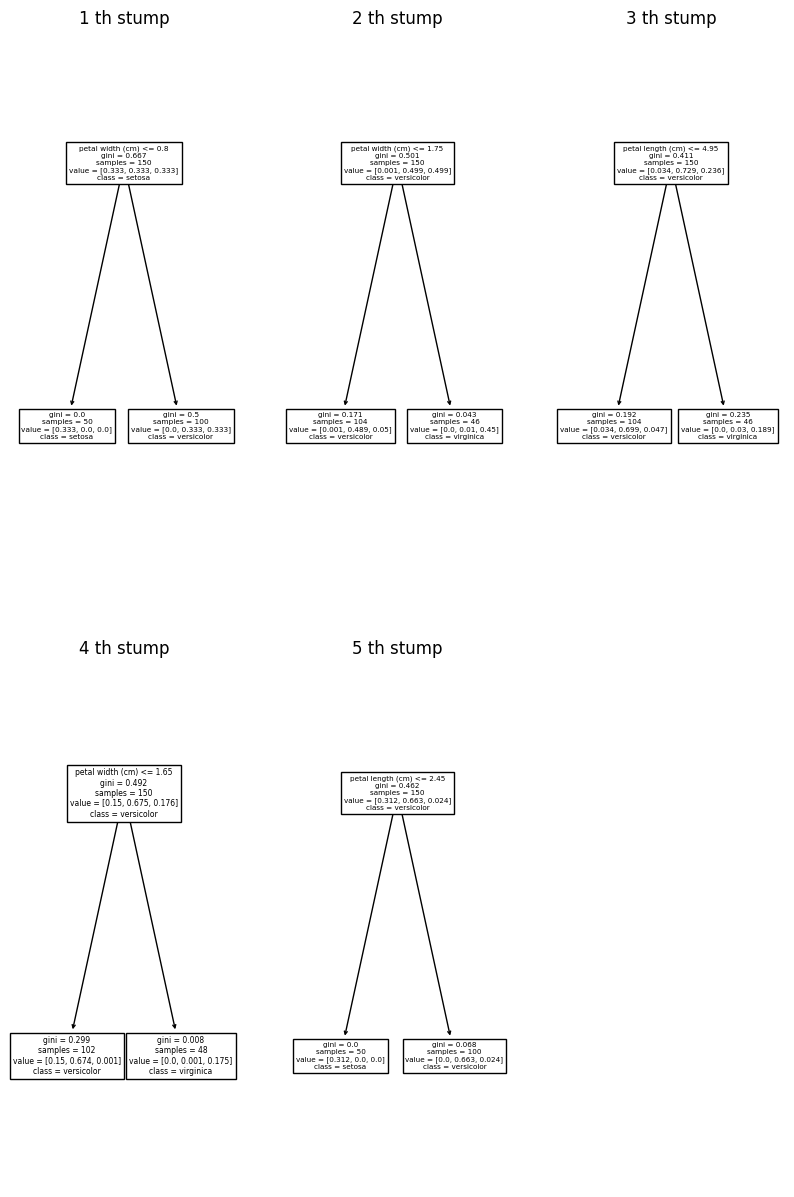

In [ ]:
n_estimator = len(clf.estimators_)
fig = plt.figure(figsize=(10, 15), facecolor='white')

row_num=2
col_num=3
for i in range(n_estimator):
    ax = fig.add_subplot(row_num, col_num, i+1)
    plot_tree(clf.estimators_[i],
              feature_names=X2.columns, ## 박스에 변수 이름 표시
              class_names=clf.classes_, ## 클래스 이름(범주 이름)
              ax=ax
             )
    ax.set_title(f'{i+1} th stump')
plt.show()

### 2. Gradient Boosting

In [ ]:
# gradient boosting for classification
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

#피팅
model = GradientBoostingClassifier().fit(X, y)

# 10개값을 갖는 한 개의 X 샘플에 대한 범주 예측
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Prediction: 1


In [ ]:
#피팅
model = GradientBoostingClassifier(n_estimators=100, max_depth=3).fit(X2, y2)

In [ ]:
## 예측
print(model.predict(X2)[:3])

## 변수 중요도
for i, col in enumerate(X2.columns):
    print(f'{col} Importance : {model.feature_importances_[i]}')

print(model.get_params())
print('Accuracy : ', model.score(X2,y2))


['setosa' 'setosa' 'setosa']
sepal length (cm) Importance : 0.006315103633581773
sepal width (cm) Importance : 0.010349924418462152
petal length (cm) Importance : 0.35015125740533776
petal width (cm) Importance : 0.6331837145426182
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Accuracy :  1.0


### 3.Gradient Boosting With XGBoost
- Extreme Gradient Boosting을 의미하며, sklearn 대신 xgboost 라이브러리 이용
- 계산 효율성을 높이며, 성능도 개선
- colab에 설치되어 있으며 필요 시 !pip install xgboost


In [ ]:
# 분류, xgboost for classification
from numpy import asarray
from xgboost import XGBClassifier

# fit
model = XGBClassifier().fit(X, y)

# prediction
row = [2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]
row = asarray(row).reshape((1, len(row)))
yhat = model.predict(row)
print('Prediction: %d' % yhat)

Prediction: 1


In [ ]:
# fit
y2_1 = pd.get_dummies(y2)
model = XGBClassifier().fit(X2, y2_1)
model.score(X2, y2_1)

1.0